In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict


In [2]:
class CricState(TypedDict):
    runs:int
    balls:int
    fours:int
    sixes:int

    sr:float
    bpb:float
    boundary_percentage:float
    summary:str


In [3]:
def calc_sr(state:CricState):
    sr=(state['runs']/state['balls'])*100

    return {"sr": sr}

def calc_bpb(state:CricState):
    bpb=(state['balls']/state['fours']+state['sixes'])

    return {"bpb": bpb}

def calc_bp(state:CricState):
    boundary_percentage=(((state['fours']*4)+(state['sixes']*6))/state['runs'])*100
 
    return {"boundary_percentage": boundary_percentage}

def summary(state: CricState) -> str:
    text = (
        f"The batsman scored runs at a strike rate of {state['sr']:.2f}, "
        f"his balls per boundary (BPB) is {state['bpb']:.2f}, "
        f"and his boundary percentage is {state['boundary_percentage']:.2f}%."
    )
    return {"summary": text}

In [4]:
graph=StateGraph(CricState)

graph.add_node("calc_sr",calc_sr)
graph.add_node("calc_bpb",calc_bpb)
graph.add_node("calc_bp",calc_bp)
graph.add_node("summary",summary)

graph.add_edge(START,"calc_sr")
graph.add_edge(START,"calc_bpb")
graph.add_edge(START,"calc_bp")


graph.add_edge("calc_sr","summary")
graph.add_edge("calc_bpb","summary")
graph.add_edge("calc_bp","summary")

graph.add_edge("summary",END)

workflow=graph.compile()


In [5]:
workflow.invoke({"runs":100,"balls":60,"fours":10,"sixes":2})


{'runs': 100,
 'balls': 60,
 'fours': 10,
 'sixes': 2,
 'sr': 166.66666666666669,
 'bpb': 8.0,
 'boundary_percentage': 52.0,
 'summary': 'The batsman scored runs at a strike rate of 166.67, his balls per boundary (BPB) is 8.00, and his boundary percentage is 52.00%.'}

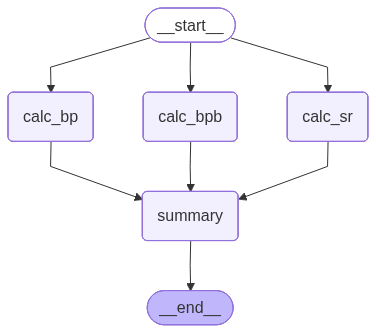

In [6]:
from IPython.display import Image

# Call the method to get the PNG bytes
Image(workflow.get_graph().draw_mermaid_png())